In [1]:
import pandas as pd
import re
import json
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'

In [2]:
files = ['배우리프로.json', '최남매_골프.json','프로랜서tv.json','프로허석.json'] # Youtube로부터 8/3일 데이터 읽어옴

df_frame={}
frames = []
for file in files:
    data = None
    with open(file, 'r') as f:
        data=json.load(f)

    channel_id, stats = data.popitem()
    video_stats = stats['video_data']

    video_data = []
    for vid in video_stats.items():
        video_id = vid[0]
        title = vid[1]['title']
        views = int(vid[1]['viewCount'])
        likes = int(vid[1]['likeCount'])
        dislikes = int(vid[1]['dislikeCount'])
        # comments = int(vid[1]['commentCount'])
        release = vid[1]['publishedAt']
        video_data.append([title, views, likes, dislikes, release, file[:-5]])

    video = pd.DataFrame(video_data, columns=['title','viewCount', 'likeCount', 'dislikeCount', 'release', 'channel'])
    video['release'] = video['release'].apply(lambda x: x[:10])
    video['release'] = pd.to_datetime(video['release'])
    df_frame[file] = video
    frames.append(df_frame[file])

video = pd.concat(frames)


In [3]:
video.set_index('title', inplace=True)

## 조회수 기준 상위 30 동영상 제목

In [4]:
video.sort_values('viewCount', ascending=False).head(30) # 161개 비디오 중 누적 뷰 상위 30개만 디스플레이

,viewCount,likeCount,dislikeCount,release,channel
title,,,,,
"백스윙 잘하는법 , 백스윙올리는법 , 3단계를 익혀서 백스윙마스터하기.",974681,9068,396,2018-07-26,최남매_골프
[골프레슨] 프로들은 이것만 생각해서 공을 똑바로칩니다 여태까지 뭐했나 싶은 영상 오전8시30분 출근길레슨 허석프로,783812,12306,333,2020-02-05,프로허석
프로로 만들어준 '최고의' 연습방법 '이것만 하세요' 오전8시30분 출근길레슨 허석프로,686205,18618,222,2020-03-25,프로허석
230M나가던 저를 평균260M로 만들어준 드라이버 거리내는 방법,652912,5318,196,2018-07-11,최남매_골프
최민욱프로) 드라이버에서 아주 중요한 부분입니다! 드라이버 손목 풀림의 중요성! (드라이버잘치는법),636198,4241,308,2018-11-19,최남매_골프
잘못된 공 위치 때문에 스윙이 망가질 수 있다는 사실을 아시나요? / 공위치 / 7번아이언 / 피칭,559207,5106,335,2019-12-15,배우리프로
[출근길레슨] 드라이버 빵!빵!쳐도 똑바로 칠수있다 이것만 지키면 오전8시반 허석프로,535624,8049,211,2020-04-29,프로허석
"가을하늘 아래 미녀골퍼들의 골프!? ※눈호강주의 (최나연프로,최예지프로,정서빈프로)",469017,2328,143,2019-10-14,최남매_골프
우드 잘치는법 ( 절대하면안되는 두가지 // 꼭지켜야할 세가지 ),425602,3355,131,2020-05-14,프로랜서tv


In [5]:
video['viewCount/day'] = video['viewCount'] / ((pd.to_datetime('today') - video['release']).dt.days)
video['viewCount/day'] = video['viewCount/day'].astype('int')

## 일평균 조회수 기준 상위 30위 (등록일 보정)

In [6]:
video.sort_values('viewCount/day', ascending=False).head(30) # 161개 비디오중 일 뷰 상위 30개만 디스플레이

,viewCount,likeCount,dislikeCount,release,channel,viewCount/day
title,,,,,,
SUB) 하나의 차이가 30미터를 만들어 냅니다. 출근길레슨 허석프로,17465,975,10,2020-08-02,프로허석,17465
SUB)힙 스웨이를 하면 힘이 안들어가는 이유 ㅣ출근길레슨 허석프로,90828,3031,21,2020-07-26,프로허석,11353
SUB) 바디스윙 1단계 팔꿈치 사용 ㅣ출근길레슨 허석프로,40692,1411,18,2020-07-29,프로허석,8138
"SUB) 왼팔은 ""자동으로"" 펴집니다 출근길레슨 허석프로",106641,3292,30,2020-07-19,프로허석,7109
SUB) 바디스윙 다 필요없고 이것만 죽어라 하시면 싱글갑니다 꼭 보세요,292153,7739,147,2020-06-21,프로허석,6794
[자막] 리듬감의 끝판왕이 나타났다 | 실제 유명 댄서들이 리듬감을 익히는 방법입니다,18955,494,4,2020-07-31,배우리프로,6318
[자막] 끌고 내려오면 안된다 | 끌고 내려와서 힘이 들어간다.,35992,568,7,2020-07-28,배우리프로,5998
SUB) 프로들이 힘 쓰기 위해 하는 동작 BEST1 오전8시30분 출근길레슨,203183,4228,106,2020-06-28,프로허석,5643
[출근길레슨] 드라이버 빵!빵!쳐도 똑바로 칠수있다 이것만 지키면 오전8시반 허석프로,535624,8049,211,2020-04-29,프로허석,5579


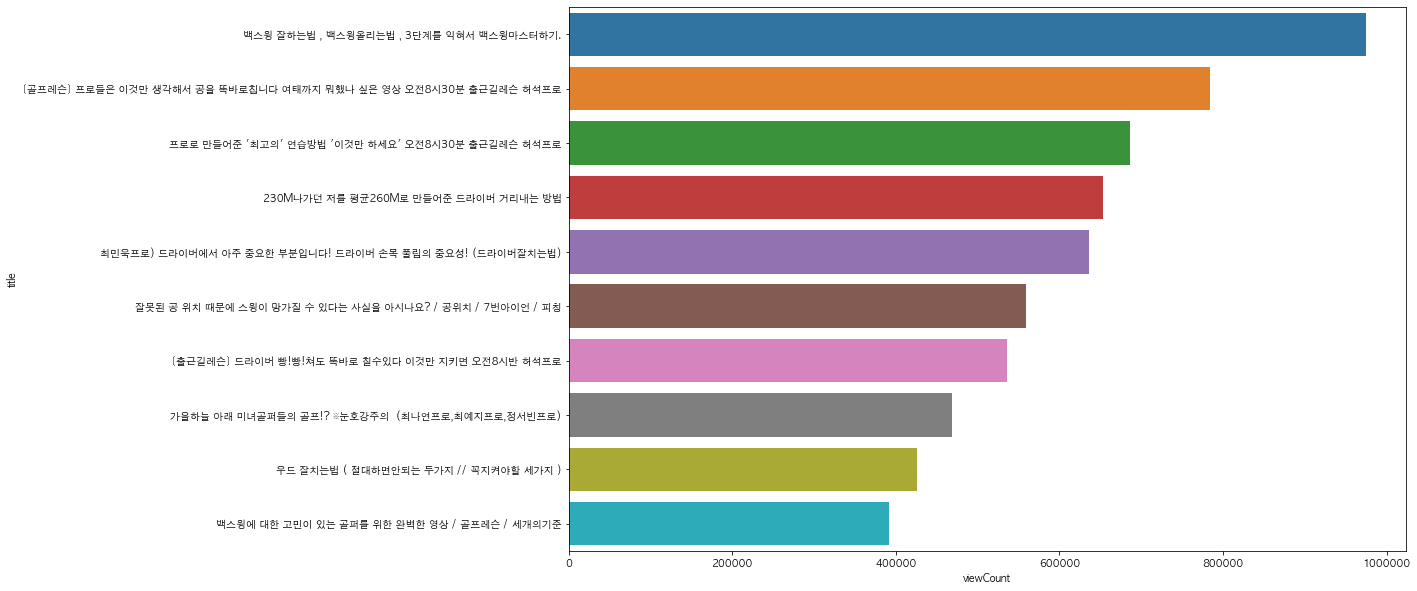

In [7]:
plt.figure(figsize=(15,10))
video_reset_index = video.reset_index()
sns.barplot(x='viewCount', y='title', data=video_reset_index.sort_values('viewCount', ascending=False)[:10])

In [8]:
df = video.reset_index()
df = df[['title', 'viewCount']].sort_values('viewCount', ascending=False)

In [9]:
import re
df['refined'] = df['title'].apply(lambda x:re.sub('[^가-힣\s0-9]', '', x))

In [10]:
sentences = df['refined'].values
from soynlp.word import WordExtractor

word_extractor = WordExtractor(min_frequency=100,
    min_cohesion_forward=0.05, 
    min_right_branching_entropy=0.0
)
word_extractor.train(sentences) # list of str or like
words = word_extractor.extract()

training was done. used memory 0.139 Gb
all cohesion probabilities was computed. # words = 8
all branching entropies was computed # words = 854
all accessor variety was computed # words = 854


In [11]:
from soynlp.tokenizer import LTokenizer
from soynlp.utils import DoublespaceLineCorpus

cohesion_score = {word:score.cohesion_forward for word, score in words.items()}
tokenizer = LTokenizer(scores=cohesion_score)

In [12]:
df['tokenized'] = df['refined'].apply(lambda x:tokenizer.tokenize(x,remove_r=True))

In [13]:
#20% 
thresh = int(len(df) *0.2)
df20 = df[:thresh]

In [14]:
words = []
for i in df20['tokenized']:
    for k in i:
        words.append(k)

In [15]:
from collections import Counter
count = Counter(words)
word_dict = dict(count)

## 채널별 상위 20%에 많이 등장하는 단어

In [16]:
sort_orders = sorted(word_dict.items(), key=lambda x: x[1], reverse=True)

for i in sort_orders:
	print(i[0], i[1])

골프 35
허석프로 28
출근길레슨 26
방법 12
오전8시30분 10
최민욱 10
레슨 10
이것만 8
드라이버 8
꼭 8
출근길 8
8시30분 7
쉽게 6
이 6
최고의 5
똑바로 5
오전 5
백스윙 4
영상 4
연습방법 4
수 4
오전8시반 4
잘치는법 4
이렇게 4
비거리 4
보세요 4
잘 4
손목 3
있는 3
위한 3
완벽한 3
허리회전 3
하면 3
다운스윙 3
하체를 3
스윙 3
빼고 3
확실한 3
자막 3
힘을 3
라운드 3
뒷땅 3
이유 3
아이언 3
치는 3
힘 3
고쳐보세요 3
사용법 3
공을 2
만들어준 2
아주 2
7번아이언 2
대한 2
이건 2
보셔야합니다 2
올바른 2
좀더 2
있습니다 2
힘빼기 2
연습하세요 2
멀리치는 2
멀리갑니다 2
영상을 2
절대 2
기억하세요 2
8시반 2
대결 2
알고 2
체중이동 2
안됩니다 2
만큼 2
프로들이 2
하는 2
궤도 2
캐스팅 2
스크린 2
통해서 2
알려드릴게요 2
칠수있습니다 2
타이거우즈 2
여러가지 2
오른팔꿈치를 2
쓰는 2
하체리드 2
로테이션 2
거리가 2
겨드랑이를 2
공이 2
잘하는법 1
백스윙올리는법 1
3단계를 1
익혀서 1
백스윙마스터하기 1
프로들은 1
생각해서 1
똑바로칩니다 1
여태까지 1
뭐했나 1
싶은 1
프로로 1
하세요 1
230나가던 1
저를 1
평균260로 1
거리내는 1
드라이버에서 1
중요한 1
부분입니다 1
풀림의 1
중요성 1
드라이버잘치는법 1
잘못된 1
공 1
위치 1
때문에 1
스윙이 1
망가질 1
있다는 1
사실을 1
아시나요 1
공위치 1
피칭 1
빵빵쳐도 1
칠수있다 1
지키면 1
가을하늘 1
아래 1
미녀골퍼들의 1
눈호강주의 1
최나연프로최예지프로정서빈프로 1
우드 1
절대하면안되는 1
두가지 1
꼭지켜야할 1
세가지 1
백스윙에 1
고민이 1
골퍼를 1
세개의기준 1
멀리칠수 1
저의 1
레슨을 1
따라오고싶다면 1
뻗기 1
여러분도 1
할수있습니다 1
연습하자 1
마이크밴더가 1
알려준 1
특급 1
연습법 1
골반과 1
써주시면